In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

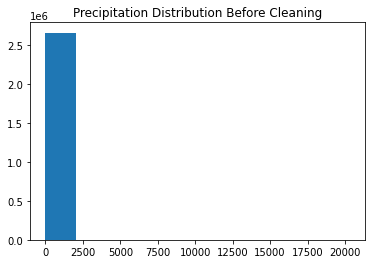

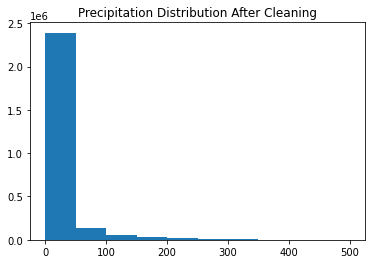

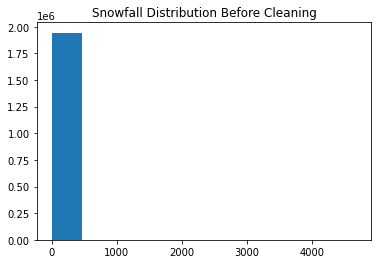

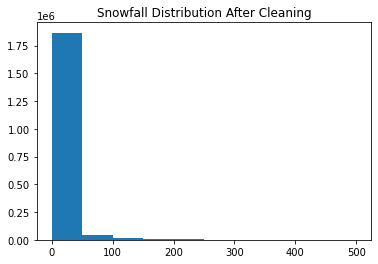

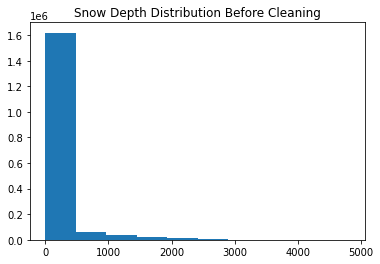

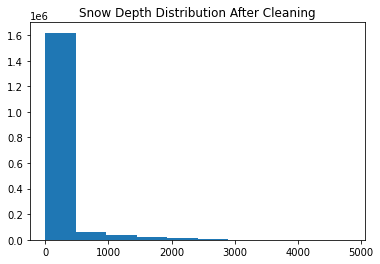

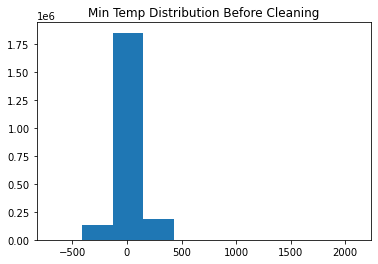

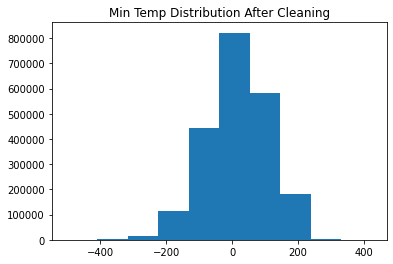

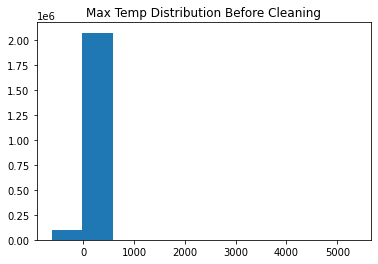

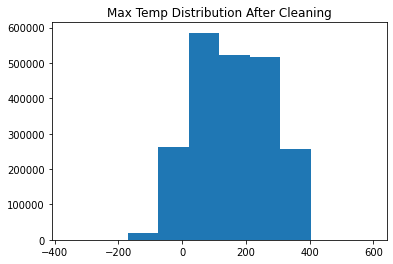

In [4]:
# Justification for these values in finding_reasonable_max_min.ipynb
PRCP_MIN = 0
PRCP_MAX = 500
SNOW_MIN = 0
SNOW_MAX = 500
SNWD_MIN = 0
SNWD_MAX = 5000
TMIN_MIN = -500
TMIN_MAX = 500
TMAX_MIN = -400
TMAX_MAX = 600

def clean(filename):
    # Load into pandas
    df = pd.read_csv(filename, index_col=0)
    # Convert into floats if not already
    for col in df.columns:
        df[col] = df[col].astype(float)
        
        
    def clean_col(df, start_col, col_name, col_min, col_max):
        # Separate out the cols for this feature
        col_df = df[df.columns[start_col:-1:5]]
        
        # Plot before
        col_values = col_df.values.reshape(-1)
        plt.hist(col_values)
        plt.title(col_name + " Distribution Before Cleaning")
        plt.show()
        
        # Clean
        col_df_cleaned = col_df.apply(lambda x: [y if (y <= col_max and y >= col_min) else np.nan for y in x])
        df[df.columns[start_col:-1:5]] = col_df_cleaned
        
        # Plot after
        col_df = df[df.columns[start_col:-1:5]]
        col_values = col_df.values.reshape(-1)
        plt.hist(col_values)
        plt.title(col_name + " Distribution After Cleaning")
        plt.show()
        
    clean_col(df, 0, 'Precipitation', PRCP_MIN, PRCP_MAX)
    clean_col(df, 1, 'Snowfall', SNOW_MIN, SNOW_MAX)    
    clean_col(df, 2, 'Snow Depth', SNWD_MIN, SNWD_MAX)    
    clean_col(df, 3, 'Min Temp', TMIN_MIN, TMIN_MAX)    
    clean_col(df, 4, 'Max Temp', TMAX_MIN, TMAX_MAX)
    
    # Save cleaned data
    df.to_csv(filename[:-4] + '_clean.csv')
    
clean('GSL_drainage_basin_dataset.csv')